In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [3]:
path = Config.data_path()/'planet'
path

PosixPath('/home/jupyter/.fastai/data/planet')

In [ ]:
# path.mkdir(exist_ok=True, parents=True)

In [9]:
#! pip install kaggle --upgrade

In [11]:
#! mkdir ~/.kaggle/

In [12]:
#! mv kaggle.json ~/.kaggle/

In [9]:
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}
#! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}

  0%|                                                | 0.00/159k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 159k/159k [00:00<00:00, 74.2MB/s]


In [13]:
#! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path}
! unzip -q -n {path}/train_v2.csv.zip -d {path}

In [4]:
path

PosixPath('/home/jupyter/.fastai/data/planet')

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/__MACOSX'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg.tar.7z'),
 PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv.zip')]

In [6]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [7]:
tfms = get_transforms(flip_vert=True, max_lighting=.1, max_zoom=1.05, max_warp=0.)

In [11]:
src = (ImageItemList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
.random_split_by_pct(.2)
.label_from_df(label_delim=' '))

In [30]:
data = (src
        .transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

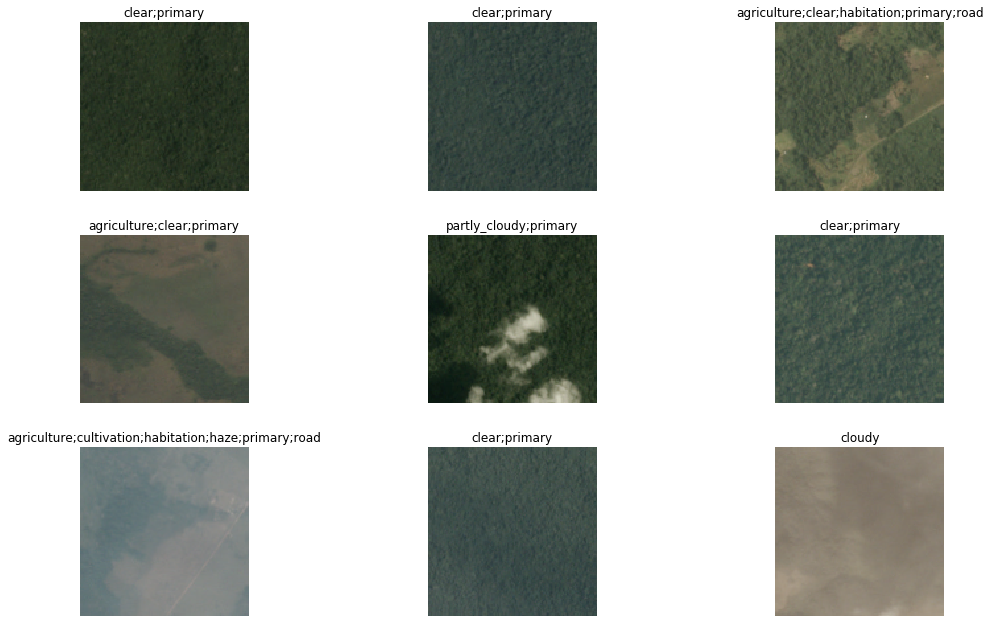

In [31]:
data.show_batch(rows=3, figsize=(15, 9))

In [32]:
arch = models.resnet50

In [38]:
acc_02 = partial(accuracy_thresh, thresh=.2)
f_score = partial(fbeta, thresh=.2)

In [39]:
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


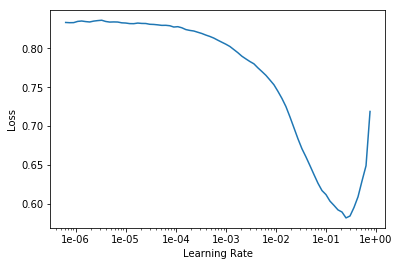

In [41]:
learn.recorder.plot()

In [42]:
lr = 3e-2

In [43]:
learn.fit_one_cycle(cyc_len=5, max_lr=slice(3e-2))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.122295,0.104780,0.947499,0.909071
2,0.129064,0.100391,0.946590,0.910188
3,0.112292,0.129923,0.946735,0.916969
4,0.098632,0.099270,0.956458,0.924561
5,0.092969,0.100507,0.957076,0.924778


In [44]:
learn.save('stage-1-rn50')

In [45]:
learn.unfreeze()

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


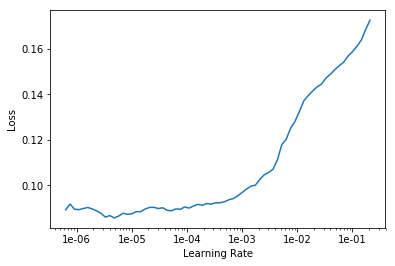

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(cyc_len=5, max_lr=slice(1e-6, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta
1,0.095837,0.091421,0.953944,0.922590
2,0.098719,0.099643,0.949998,0.917453
3,0.092908,0.089135,0.957301,0.927279
4,0.085835,0.084936,0.957076,0.928224
5,0.081705,0.188946,0.958391,0.928578


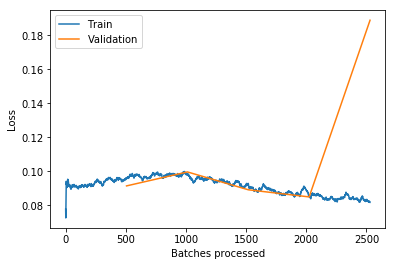

In [49]:
learn.recorder.plot_losses()

In [50]:
learn.save('stage-2-256-rn50')

In [51]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/__MACOSX'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/models'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg.tar.7z'),
 PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv.zip')]

In [52]:
learn.export()

In [53]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv'),
 PosixPath('/home/jupyter/.fastai/data/planet/__MACOSX'),
 PosixPath('/home/jupyter/.fastai/data/planet/export.pkl'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg'),
 PosixPath('/home/jupyter/.fastai/data/planet/models'),
 PosixPath('/home/jupyter/.fastai/data/planet/train-jpg.tar.7z'),
 PosixPath('/home/jupyter/.fastai/data/planet/train_v2.csv.zip')]

In [54]:
(path/'models').ls()

[PosixPath('/home/jupyter/.fastai/data/planet/models/stage-1-rn50.pth'),
 PosixPath('/home/jupyter/.fastai/data/planet/models/tmp.pth'),
 PosixPath('/home/jupyter/.fastai/data/planet/models/stage-2-256-rn50.pth')]